In [8]:
# Extraction

from pathlib import Path
from core.data_loader import extract_zip

# Location of ZIP files
base_folder = Path("kilosort_data")
print("CWD is:", Path.cwd())
print("Looking in:", base_folder.resolve())
print("Contents:", list(base_folder.iterdir()))

# Where unzipped .npz files will go
target_folder = base_folder / "extracted_data"

# Glob the ZIPs
zip_paths = sorted(base_folder.glob("*.zip"))
print(f"Found {len(zip_paths)} ZIP files")

# Build the label map (parts 1–5 of the stem)
zip_label_map = {}
for zp in zip_paths:
    parts = zp.stem.split("_")
    label = "_".join(parts[0:5])  # indices in the filename
    zip_label_map[zp.name] = label

# Extract & rename
extracted_files = {}
for zip_name, label in zip_label_map.items():
    out = extract_zip(
        zip_filename  = zip_name,
        base_folder   = base_folder,     # helper wants string path
        target_folder = target_folder,   # same here
        label         = label
    )
    if out:
        extracted_files[label] = out

print("Extraction complete:", extracted_files)


CWD is: /Users/main_mac/data/org_eval
Looking in: /Users/main_mac/data/org_eval/kilosort_data
Contents: [PosixPath('kilosort_data/25168c_D51_KOLFMO_632025_acqm.zip'), PosixPath('kilosort_data/24430c_D51_KOLFMO_632025_acqm.zip'), PosixPath('kilosort_data/24500c_D51_KOLFMO_632025_acqm.zip'), PosixPath('kilosort_data/25159c_D51_KOLFMO_632025_acqm.zip'), PosixPath('kilosort_data/24535c_D51_KOLFMO_632025_acqm.zip'), PosixPath('kilosort_data/metadata.json'), PosixPath('kilosort_data/24432c_D51_KOLFMO_632025_acqm.zip'), PosixPath('kilosort_data/23128c_D51_KOLFMO_632025_acqm.zip'), PosixPath('kilosort_data/24648c_D51_KOLFMO_632025_acqm.zip'), PosixPath('kilosort_data/24506c_D51_KOLFMO_632025_acqm.zip'), PosixPath('kilosort_data/23178c_D51_KOLFMO_632025_acqm.zip'), PosixPath('kilosort_data/23192c_D51_KOLFMO_632025_acqm.zip'), PosixPath('kilosort_data/23126c_D51_KOLFMO_632025_acqm.zip')]
Found 12 ZIP files
Renamed qm.npz → 23126c_D51_KOLFMO_632025_acqm.npz
Renamed qm.npz → 23128c_D51_KOLFMO_6320

In [9]:
from core.data_loader import load_all_data

# Load everything (or some: (extracted_files, conditions=["label_A", "label_B"]))
all_data = load_all_data(extracted_files)

Loading 23126c_D51_KOLFMO_632025_acqm ...
Loaded 157 neurons for 23126c_D51_KOLFMO_632025_acqm.
Loading 23128c_D51_KOLFMO_632025_acqm ...
Loaded 225 neurons for 23128c_D51_KOLFMO_632025_acqm.
Loading 23178c_D51_KOLFMO_632025_acqm ...
Loaded 104 neurons for 23178c_D51_KOLFMO_632025_acqm.
Loading 23192c_D51_KOLFMO_632025_acqm ...
Loaded 72 neurons for 23192c_D51_KOLFMO_632025_acqm.
Loading 24430c_D51_KOLFMO_632025_acqm ...
Loaded 43 neurons for 24430c_D51_KOLFMO_632025_acqm.
Loading 24432c_D51_KOLFMO_632025_acqm ...
Loaded 60 neurons for 24432c_D51_KOLFMO_632025_acqm.
Loading 24500c_D51_KOLFMO_632025_acqm ...
Loaded 32 neurons for 24500c_D51_KOLFMO_632025_acqm.
Loading 24506c_D51_KOLFMO_632025_acqm ...
Loaded 99 neurons for 24506c_D51_KOLFMO_632025_acqm.
Loading 24535c_D51_KOLFMO_632025_acqm ...
Loaded 114 neurons for 24535c_D51_KOLFMO_632025_acqm.
Loading 24648c_D51_KOLFMO_632025_acqm ...
Loaded 107 neurons for 24648c_D51_KOLFMO_632025_acqm.
Loading 25159c_D51_KOLFMO_632025_acqm ...
Loa

In [10]:
print(all_data.keys())  # Shows all loaded dataset labels

dict_keys(['23126c_D51_KOLFMO_632025_acqm', '23128c_D51_KOLFMO_632025_acqm', '23178c_D51_KOLFMO_632025_acqm', '23192c_D51_KOLFMO_632025_acqm', '24430c_D51_KOLFMO_632025_acqm', '24432c_D51_KOLFMO_632025_acqm', '24500c_D51_KOLFMO_632025_acqm', '24506c_D51_KOLFMO_632025_acqm', '24535c_D51_KOLFMO_632025_acqm', '24648c_D51_KOLFMO_632025_acqm', '25159c_D51_KOLFMO_632025_acqm', '25168c_D51_KOLFMO_632025_acqm'])


In [11]:

import importlib
from org_eval import sttc_analyzer

importlib.reload(sttc_analyzer)
from org_eval.sttc_analyzer import STTCAnalyzer

In [12]:
from core.data_loader import load_npz_data, normalize_conditions
loaded_data = load_all_data(extracted_files)
dataset_names = list(loaded_data.keys())

analyzers = {}

for name in dataset_names:
    data = loaded_data[name]
    spike_trains = data["spike_times_sec"]
    neuron_data = data["neuron_data"]
    fs = data["fs"]

    recording_length = max(
        (max(times) for times in spike_trains.values() if len(times) > 0),
        default=0
    )

    analyzers[name] = STTCAnalyzer(
        dataset_name=name,
        spike_trains=spike_trains,
        recording_length=recording_length,
        neuron_data=neuron_data,
        delt=0.02,
        num_shuffles=100,
        threshold=2.5,
        fs=fs
    )


Loading 23126c_D51_KOLFMO_632025_acqm ...
Loaded 157 neurons for 23126c_D51_KOLFMO_632025_acqm.
Loading 23128c_D51_KOLFMO_632025_acqm ...
Loaded 225 neurons for 23128c_D51_KOLFMO_632025_acqm.
Loading 23178c_D51_KOLFMO_632025_acqm ...
Loaded 104 neurons for 23178c_D51_KOLFMO_632025_acqm.
Loading 23192c_D51_KOLFMO_632025_acqm ...
Loaded 72 neurons for 23192c_D51_KOLFMO_632025_acqm.
Loading 24430c_D51_KOLFMO_632025_acqm ...
Loaded 43 neurons for 24430c_D51_KOLFMO_632025_acqm.
Loading 24432c_D51_KOLFMO_632025_acqm ...
Loaded 60 neurons for 24432c_D51_KOLFMO_632025_acqm.
Loading 24500c_D51_KOLFMO_632025_acqm ...
Loaded 32 neurons for 24500c_D51_KOLFMO_632025_acqm.
Loading 24506c_D51_KOLFMO_632025_acqm ...
Loaded 99 neurons for 24506c_D51_KOLFMO_632025_acqm.
Loading 24535c_D51_KOLFMO_632025_acqm ...
Loaded 114 neurons for 24535c_D51_KOLFMO_632025_acqm.
Loading 24648c_D51_KOLFMO_632025_acqm ...
Loaded 107 neurons for 24648c_D51_KOLFMO_632025_acqm.
Loading 25159c_D51_KOLFMO_632025_acqm ...
Loa

In [13]:
# Load data
spike_trains = loaded_data["25159c_D51_KOLFMO_632025_acqm"]["spike_times_sec"]
neuron_data = loaded_data["25159c_D51_KOLFMO_632025_acqm"]["neuron_data"]

# Sort keys from both
sorted_spike_keys = sorted(spike_trains.keys())
sorted_meta_keys = sorted(neuron_data.keys())

# Sanity check
if len(sorted_spike_keys) != len(sorted_meta_keys):
    print(f" Mismatch: {len(sorted_spike_keys)} spike trains vs {len(sorted_meta_keys)} metadata entries\n")
else:
    print(f" Matched: {len(sorted_spike_keys)} spike trains and metadata entries\n")

# Align both as lists by sorted keys
aligned_spike_trains = [spike_trains[k] for k in sorted_spike_keys]
aligned_metadata = [neuron_data[k] for k in sorted_meta_keys]

# Loop through all neurons and print info
for i in range(len(aligned_spike_trains)):
    print(f"Neuron {i}")
    print(f"  Key (spikes):    {sorted_spike_keys[i]}")
    print(f"  Key (metadata):  {sorted_meta_keys[i]}")
    print(f"  Spike count:     {len(aligned_spike_trains[i])}")
    print(f"  First 5 spikes:  {aligned_spike_trains[i][:5]}")

    meta = aligned_metadata[i]
    if meta:
        print(f"  Position:        {meta.get('position')}")
        print(f"  Channel:         {meta.get('channel')}")
        print(f"  Template[0:5]:   {meta.get('template', [])[:5]}")
    else:
        print("  Metadata:        None")
    print("-" * 60)

 Matched: 196 spike trains and metadata entries

Neuron 0
  Key (spikes):    2
  Key (metadata):  0
  Spike count:     931
  First 5 spikes:  [239.3847  239.71275 240.0031  240.0259  240.2711 ]
  Position:        [2747.5   35. ]
  Channel:         972
  Template[0:5]:   [-0.03423383 -0.03631974 -0.03068293  0.00395839 -0.01917999]
------------------------------------------------------------
Neuron 1
  Key (spikes):    5
  Key (metadata):  1
  Spike count:     5117
  First 5 spikes:  [0.25165 0.2621  0.571   0.5819  0.95205]
  Position:        [3517.5  630. ]
  Channel:         83
  Template[0:5]:   [-0.05386428 -0.07725918 -0.1251067  -0.10987949 -0.04448121]
------------------------------------------------------------
Neuron 2
  Key (spikes):    6
  Key (metadata):  2
  Spike count:     2600
  First 5 spikes:  [0.4211  0.83235 0.90355 1.6615  1.7897 ]
  Position:        [3535.   297.5]
  Channel:         477
  Template[0:5]:   [-0.09004714 -0.04877149 -0.09844691 -0.14074925 -0.048744

Plotting 23126c_D51_KOLFMO_632025_acqm


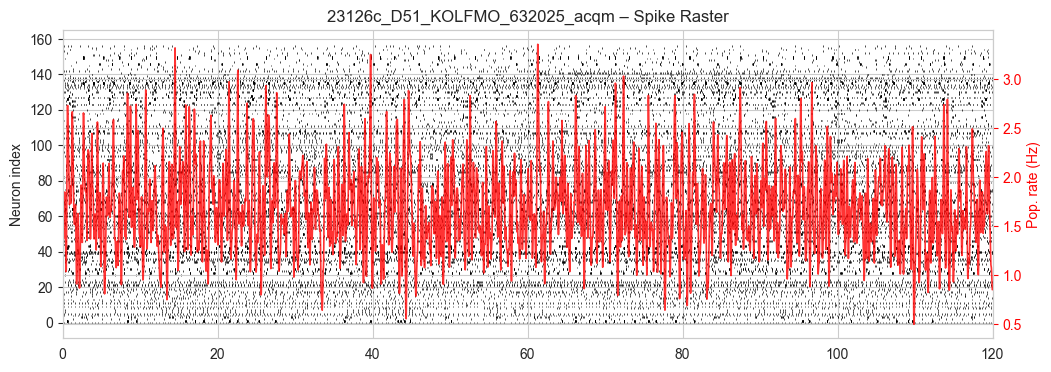

Plotting 23128c_D51_KOLFMO_632025_acqm


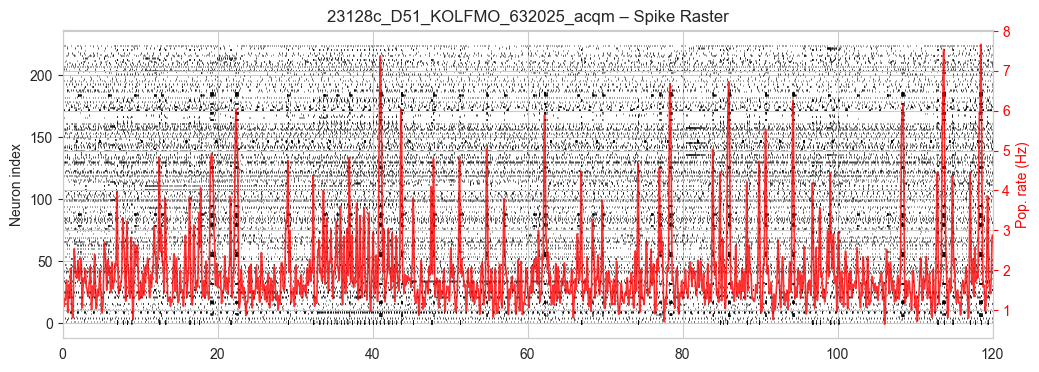

Plotting 23178c_D51_KOLFMO_632025_acqm


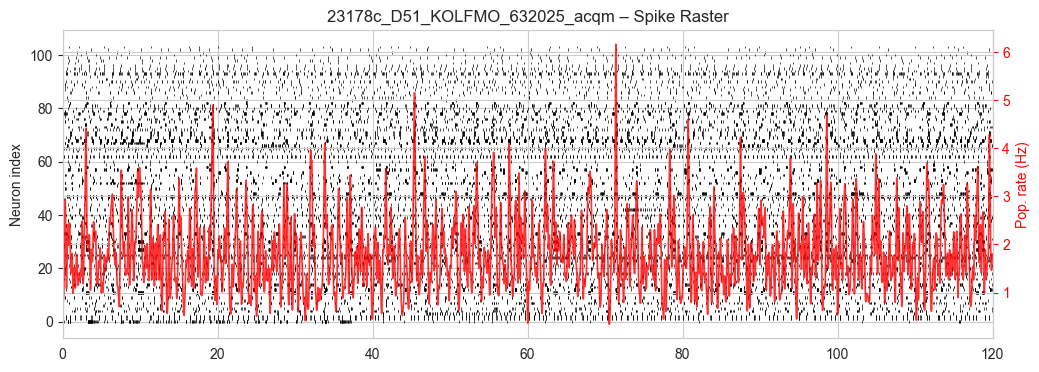

Plotting 23192c_D51_KOLFMO_632025_acqm


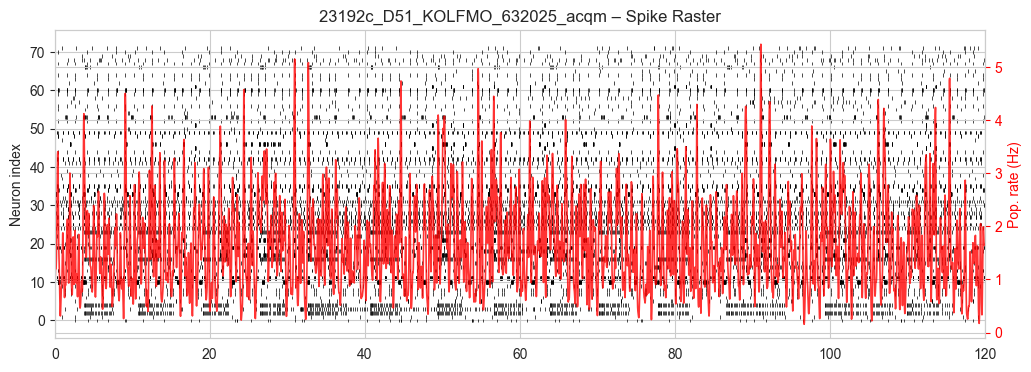

Plotting 24430c_D51_KOLFMO_632025_acqm


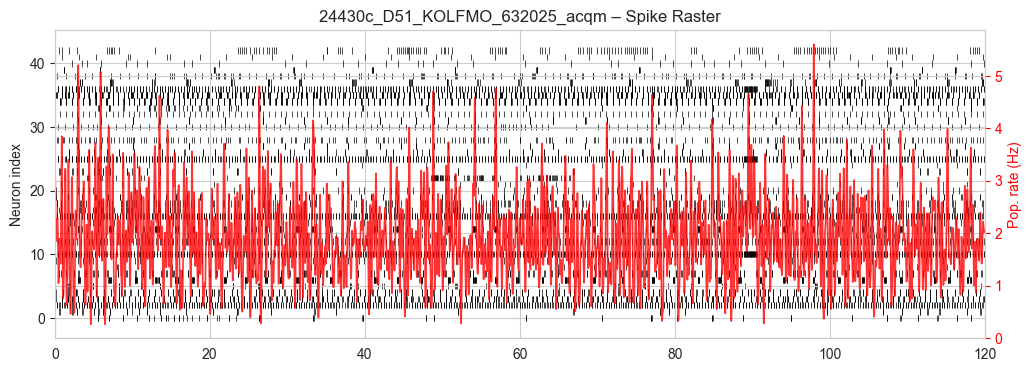

Plotting 24432c_D51_KOLFMO_632025_acqm


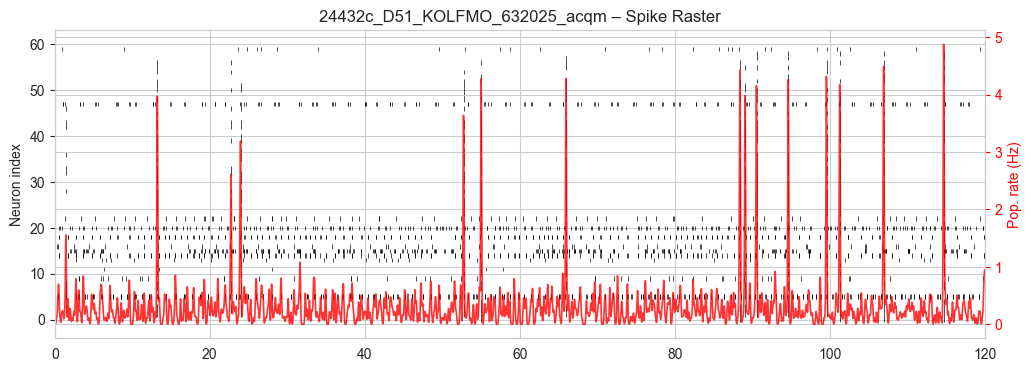

Plotting 24500c_D51_KOLFMO_632025_acqm


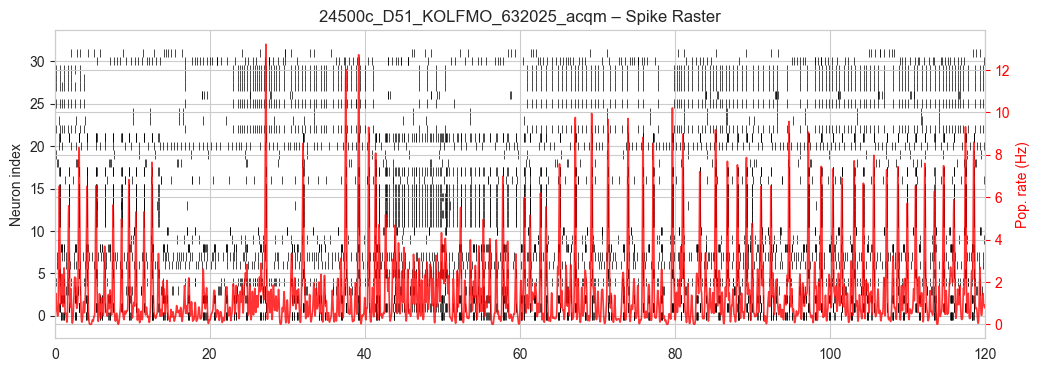

Plotting 24506c_D51_KOLFMO_632025_acqm


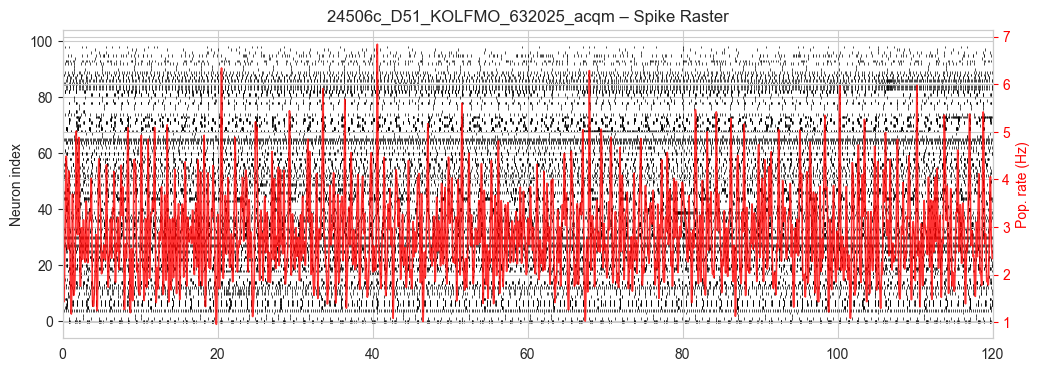

Plotting 24535c_D51_KOLFMO_632025_acqm


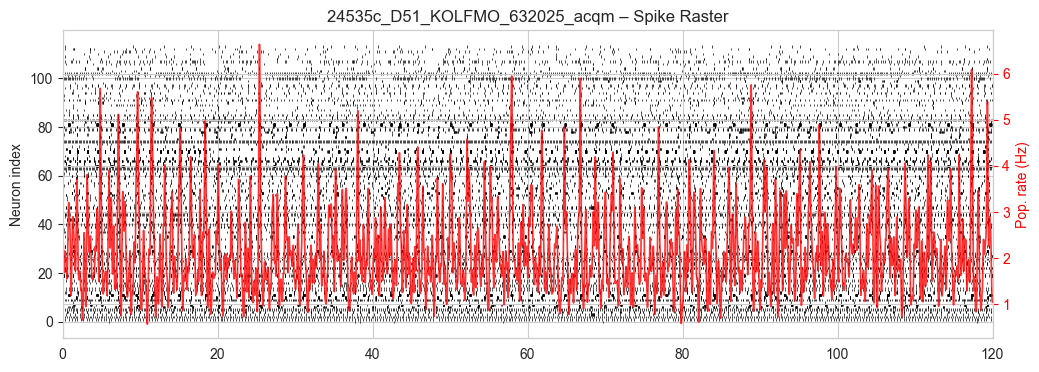

Plotting 24648c_D51_KOLFMO_632025_acqm


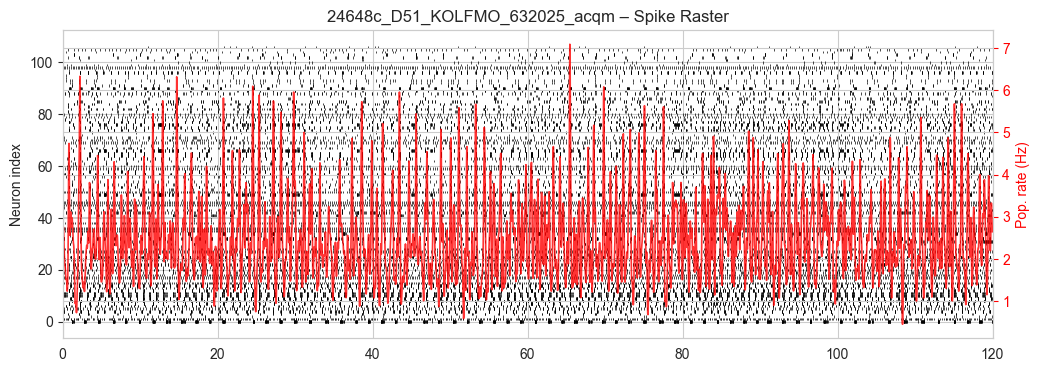

Plotting 25159c_D51_KOLFMO_632025_acqm


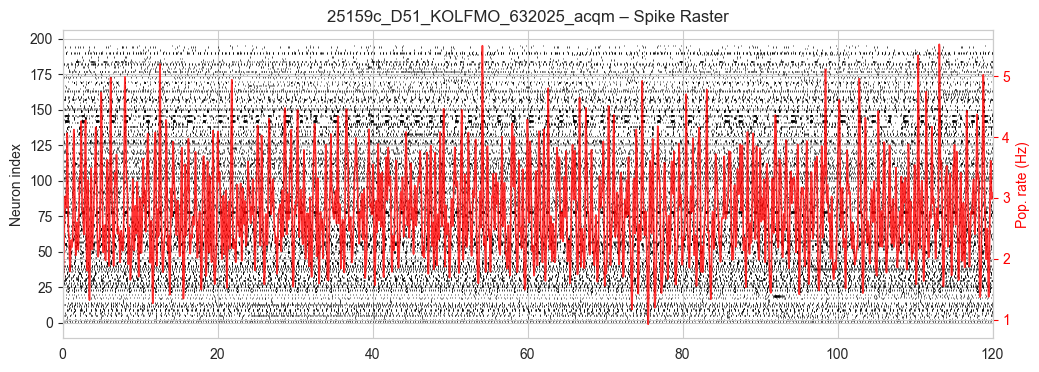

Plotting 25168c_D51_KOLFMO_632025_acqm


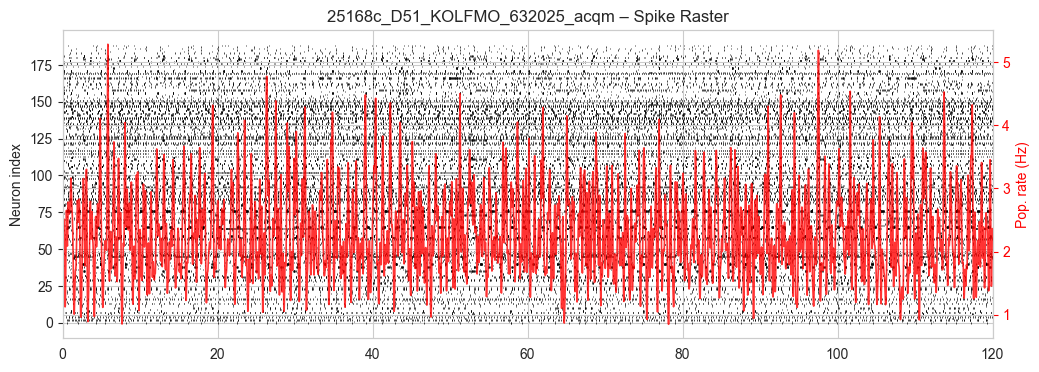

In [15]:
dataset_names = ['23126c_D51_KOLFMO_632025_acqm', '23128c_D51_KOLFMO_632025_acqm', '23178c_D51_KOLFMO_632025_acqm', '23192c_D51_KOLFMO_632025_acqm', '24430c_D51_KOLFMO_632025_acqm', '24432c_D51_KOLFMO_632025_acqm', '24500c_D51_KOLFMO_632025_acqm', '24506c_D51_KOLFMO_632025_acqm', '24535c_D51_KOLFMO_632025_acqm', '24648c_D51_KOLFMO_632025_acqm', '25159c_D51_KOLFMO_632025_acqm', '25168c_D51_KOLFMO_632025_acqm']
for name in dataset_names:
    print(f"Plotting {name}")
    analyzers[name].plot_raster_population_overlay(duration=120)


In [16]:
import numpy as np
from scipy.stats import spearmanr


def compute_rank_order_correlation(burst_spike_times, bursts, unit_ids, num_shuffles=100):
    """
    Parameters:
    - burst_spike_times: dict of {burst_id: {unit_id: spike_times (np.array)}}
    - bursts: list of burst_ids in order
    - unit_ids: list of all unit_ids
    - num_shuffles: number of shuffles for null distribution

    Returns:
    - rho_matrix: Spearman correlation matrix (num_bursts x num_bursts)
    - zscore_matrix: Z-scored Spearman matrix based on shuffled correlations
    """
    num_bursts = len(bursts)
    peak_time_mat = []
    backbone_units = []

    # Step 1: Select backbone units
    for unit in unit_ids:
        spike_counts = [len(burst_spike_times[burst].get(unit, [])) for burst in bursts]
        in_bursts = [count >= 2 for count in spike_counts]
        pct_active = sum(in_bursts) / num_bursts
        if 0.8 <= pct_active <= 1.0:
            backbone_units.append(unit)

    # Step 2: Compute peak times (using 1/ISI)
    for unit in backbone_units:
        unit_peak_times = []
        for burst in bursts:
            spikes = np.sort(burst_spike_times[burst].get(unit, []))
            if len(spikes) < 2:
                unit_peak_times.append(np.nan)
                continue
            isi = np.diff(spikes)
            if len(isi) == 0:
                unit_peak_times.append(np.nan)
                continue
            rate = 1 / isi
            peak_idx = np.argmax(rate)
            peak_time = spikes[peak_idx]  # relative to burst
            unit_peak_times.append(peak_time)
        peak_time_mat.append(unit_peak_times)

    peak_time_mat = np.array(peak_time_mat)  # shape: [num_units, num_bursts]

    # Step 3: Spearman correlation across bursts
    rho_matrix, _ = spearmanr(peak_time_mat, axis=0)  # shape: [num_bursts, num_bursts]

    # Step 4: Shuffling
    shuffled_rhos = []
    for _ in range(num_shuffles):
        shuffled = np.apply_along_axis(np.random.permutation, 1, peak_time_mat)
        shuff_rho, _ = spearmanr(shuffled, axis=0)
        shuffled_rhos.append(shuff_rho)
    shuffled_rhos = np.array(shuffled_rhos)  # shape: [num_shuffles, num_bursts, num_bursts]

    # Step 5: Z-scoring
    mean_shuff = np.mean(shuffled_rhos, axis=0)
    std_shuff = np.std(shuffled_rhos, axis=0)
    zscore_matrix = (rho_matrix - mean_shuff) / std_shuff

    return rho_matrix, zscore_matrix


In [17]:
import numpy as np
from scipy.ndimage import gaussian_filter1d

def compute_instantaneous_firing_rate(t_spk_mat, time_range, condition_index, gauss_sigma=50):
    """
    Parameters:
    - t_spk_mat: binary array [time_ms, units, conditions]
    - time_range: (start_sec, end_sec)
    - condition_index: int, which condition (c) to analyze
    - gauss_sigma: smoothing sigma in ms (sample units, not sec)

    Returns:
    - rate_mat: array [time_ms, units] with smoothed ISI-based firing rate
    """
    time_start, time_end = int(time_range[0]*1000), int(time_range[1]*1000)
    n_time = time_end
    n_units = t_spk_mat.shape[1]

    rate_mat = np.zeros((n_time, n_units))

    for unit in range(n_units):
        # Get spike times (in ms)
        spike_train = t_spk_mat[:, unit, condition_index]
        spk_times = np.where(spike_train)[0]

        # Filter spike times to valid range
        spk_times = spk_times[(spk_times >= time_start) & (spk_times <= time_end)]
        spk_times = spk_times[spk_times > 0]  # Remove spikes at or before t=0

        if len(spk_times) < 2:
            continue  # skip if too few spikes

        # Compute ISIs and inverse ISI rates
        isi = np.diff(spk_times)
        isi = np.insert(isi, 0, np.nan)  # Align ISI with spike_times
        isi_rate = 1.0 / isi  # in 1/ms

        # Build a time-series array with ISI rate values between spike times
        isi_rate_series = np.zeros(n_time)
        for i in range(1, len(spk_times)):
            start = spk_times[i - 1]
            end = spk_times[i]
            if end >= n_time:
                break
            isi_rate_series[start:end] = isi_rate[i]  # use next ISI

        # Smooth with Gaussian (converted to Hz)
        smoothed_rate = 1000 * gaussian_filter1d(isi_rate_series, sigma=gauss_sigma)
        rate_mat[:, unit] = smoothed_rate

    return rate_mat